In [1]:
import sys

In [2]:
typeList = dict()
typeList[0]='axes'
typeList[1]='boots'
typeList[2]='carabiners'
typeList[3]='crampons'
typeList[4]='gloves'
typeList[5]='hardshell_jackets'
typeList[6]='harnesses'
typeList[7]='helmets'
typeList[8]='insulated_jackets'
typeList[9]='pulleys'
typeList[10]='ropes'
typeList[11]='tents'
print(typeList)

{0: 'axes', 1: 'boots', 2: 'carabiners', 3: 'crampons', 4: 'gloves', 5: 'hardshell_jackets', 6: 'harnesses', 7: 'helmets', 8: 'insulated_jackets', 9: 'pulleys', 10: 'ropes', 11: 'tents'}


# Keras

# Compile Model

In [3]:
print('start')
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3), data_format='channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(12))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Complete-4')

start


/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Complete-4


# Prep Data

In [4]:
print ('start')

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'training_images',  # this is the target directory
        target_size=(128, 128),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'test_images',
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='categorical')

print ('complete-4')

start
Found 1702 images belonging to 12 classes.
Found 420 images belonging to 12 classes.
complete-4


# Train model

In [5]:
print ('start')

epochCount = 20

history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training
model.save('challenge4-model.h5')

print ('complete-3')

start
Epoch 1/20
125/125 [==============================] - 9s 71ms/step - loss: 2.0044 - acc: 0.3263 - val_loss: 1.2269 - val_acc: 0.6381
Epoch 2/20
125/125 [==============================] - 7s 57ms/step - loss: 1.4471 - acc: 0.4977 - val_loss: 0.8390 - val_acc: 0.7690
Epoch 3/20
125/125 [==============================] - 7s 58ms/step - loss: 1.1932 - acc: 0.5998 - val_loss: 0.5879 - val_acc: 0.7929
Epoch 4/20
125/125 [==============================] - 7s 58ms/step - loss: 1.0145 - acc: 0.6647 - val_loss: 0.6964 - val_acc: 0.7810
Epoch 5/20
125/125 [==============================] - 7s 57ms/step - loss: 0.8378 - acc: 0.7245 - val_loss: 0.6522 - val_acc: 0.7881
Epoch 6/20
125/125 [==============================] - 7s 58ms/step - loss: 0.7772 - acc: 0.7365 - val_loss: 0.4278 - val_acc: 0.8452
Epoch 7/20
125/125 [==============================] - 7s 58ms/step - loss: 0.6844 - acc: 0.7625 - val_loss: 0.3712 - val_acc: 0.8952
Epoch 8/20
125/125 [==============================] - 7s 58ms/s

# Print Graph

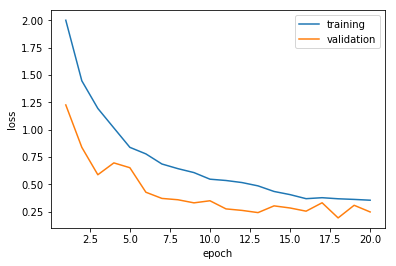

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

epochCount = range(1,epochCount+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epochCount, training_loss)
plt.plot(epochCount, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

# Test Model

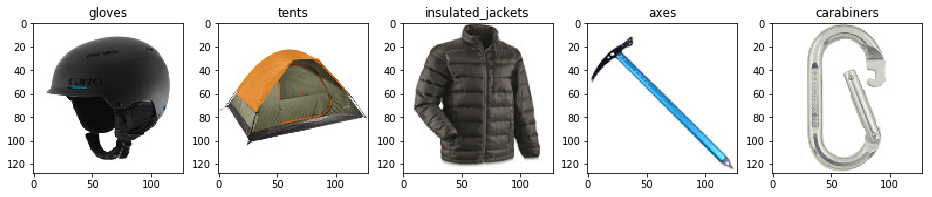

In [7]:
# Test





import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
from PIL import Image
#import tensorflow as tf

# Needed to display matplotlib plots in Jupyter
%matplotlib inline

imgdir = 'test_images_from_bing' # Folder containing extracted images

# Create a figure to display the images
fig = plt.figure(figsize=(16, 16))

# loop recursively through the folders
dir_num = 0

for subdir, dirs, files in os.walk(imgdir):
    for file in files:
        images = []
        filepath = subdir + os.sep + file
        folder = subdir.rsplit('/', 1)
        # in each folder, get the first file
        imagePIL = PIL.Image.open(filepath)
        
        images.append(np.array(imagePIL).ravel())
        typeName = filepath.rsplit('/', 1)[-1]
        typeName = typeName.split('.')[0]
        
        imageBits = np.array(imagePIL)

        imageBits = imageBits / 255
        imageBits = np.expand_dims(imageBits, axis=0)

        predictions = model.predict(imageBits)
    
        predictedType = np.argmax(predictions, axis=1)
        textPredictedType = typeList[predictedType[0]]

        # Convert to Numpy Array so we can check the channels
        image = np.array(imagePIL)
        # Add File image to our grid
        a=fig.add_subplot(len(files),len(files),dir_num + 1)
        imgplot = plt.imshow(image)
        # Add the file name (the class of the image)
        # This should be changed to use the prediction pulled back from our model
        # a.set_title(typeName)
        title = 'P:',textPredictedType
        a.set_title(textPredictedType)
        dir_num = dir_num + 1

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
__________